# Confidence Intervals

Confidence interval is a range of values in which there's a specified probability that the expected true population parameter lies within it.

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

Generating sample means distribution for demo. The distribution is normally distributed with mean equal to population mean which is 4 here.

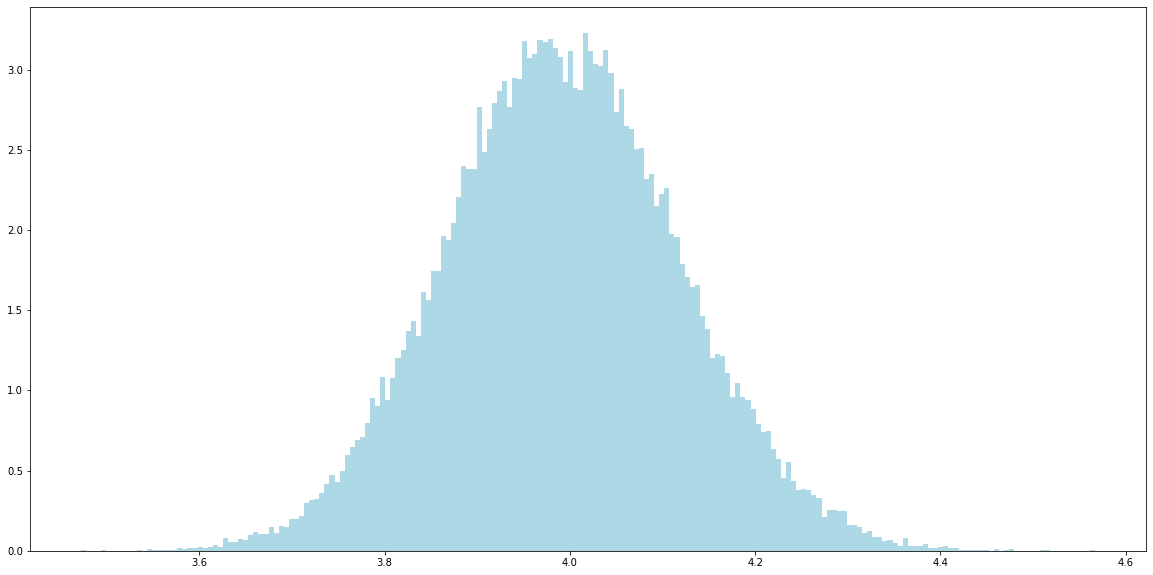

In [19]:
# use gamma distribution
shape, scale = 2.0, 2.0  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)

# create sample mean distribution
meansample = []
# sample size
samplesize = 500
for j in range(0,50000):
    # sampling 500 sample from population
    rc = random.choices(s, k=samplesize)
    # collect mean of each sample
    meansample.append(sum(rc)/len(rc))

plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.show()

Using Z-table to create range that covers 95% of the sample mean which is shown by the navy blue lines. If the population os sampled and mean is calculated, 95% of the time we will get the mean between the blue lines.
<br> Sampling 50K values is not feasible. Suppose we sample once and get a mean of 3.85 which is shown by the black line which lies between the range covering 95% of sample mean(navy blue lines).

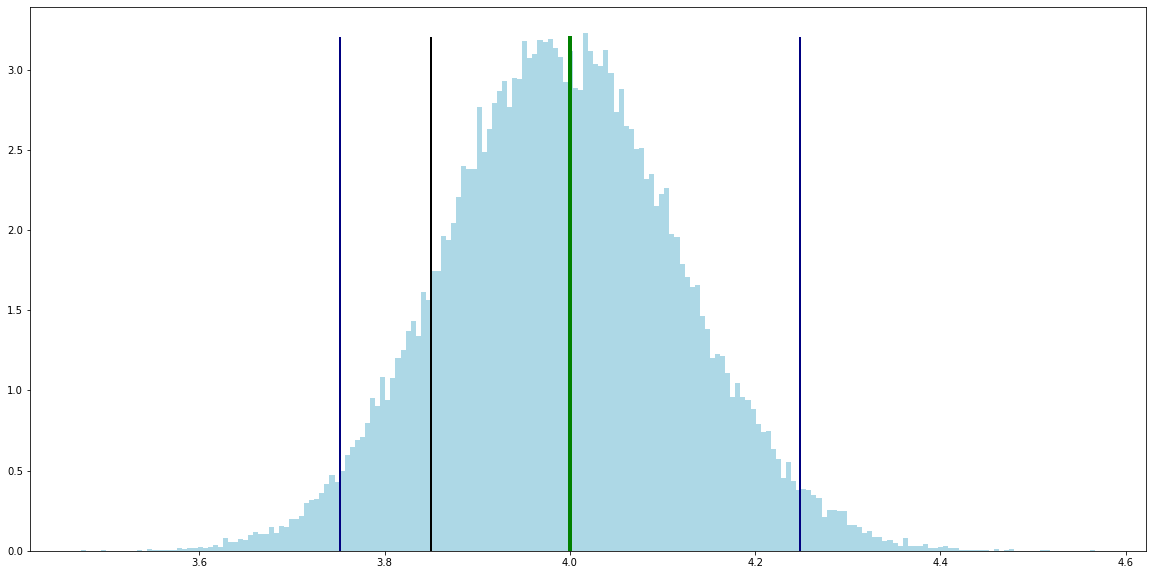

In [20]:
# suppose that we sample 500 data that has a mean as 3.85

# Xbar mean = 3.85, sigma = sigma/np.sqrt(samplesize)
m, ss = 3.85, sigma/np.sqrt(samplesize) # mean and standard deviation
plt.figure(figsize=(20,10))
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=2, color='black')
plt.show()

To create an esimator to estimate the value of true mean, a confidence interval is created by using 95% range represented by the yellow area.
<br>This interval now covers the true mean (green) as the sample means fall within a 95% range from the population mean.

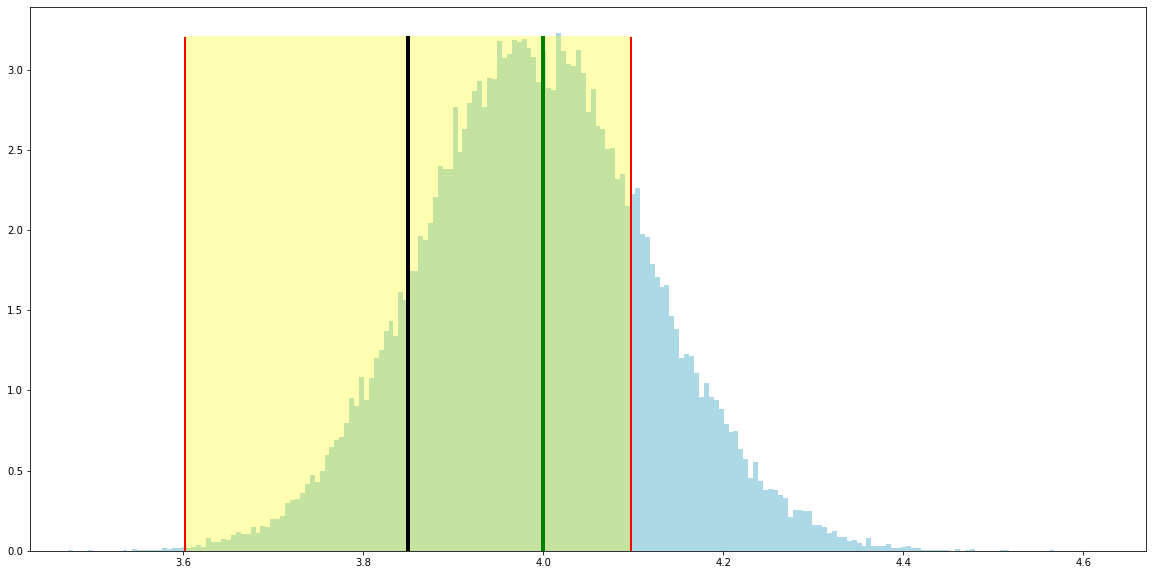

In [21]:
# create an interval around sample mean that we got
plt.figure(figsize=(20,10))

plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
# plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
# plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

The sample mean being random, there is a 5% probability that it will fall outside the 95% range. Which is represented below. The sample mean is 3.72 which lies outside the 95% range.
<br> The yellow area does not cover the population mean.

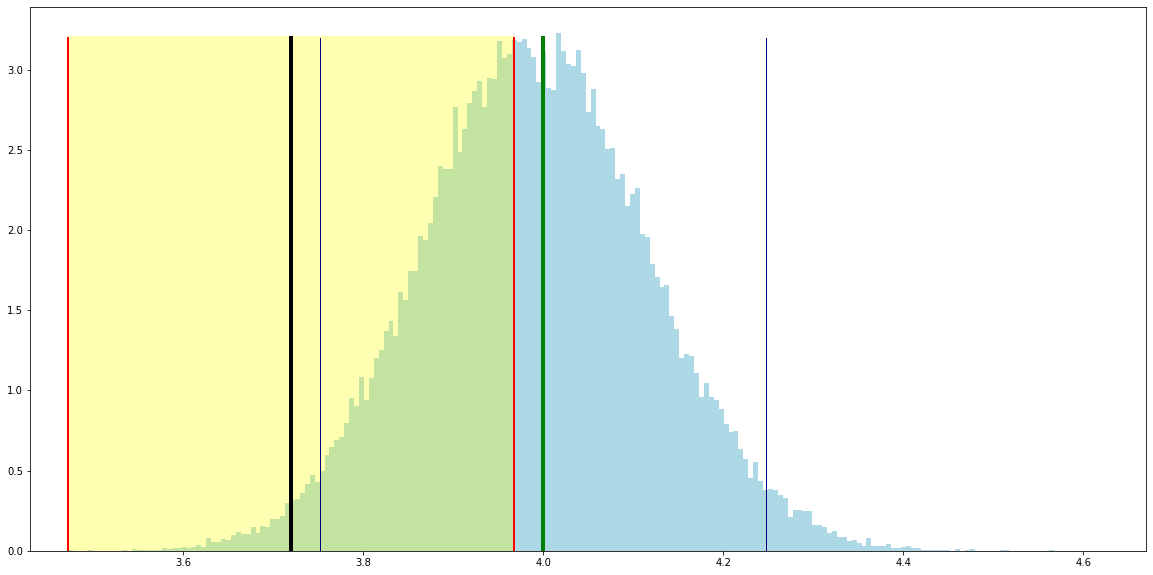

In [24]:
# if the interval is not within 95% range from population mean the interval will not cover the true population mean
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.96*sigma/np.sqrt(samplesize)),mu-(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.96*ss),m-(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.96*ss),m+(1.96*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.96*ss), 0),2*(1.96*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()

If we set the confidence interval to 90% range, it can be represented as the figure below.

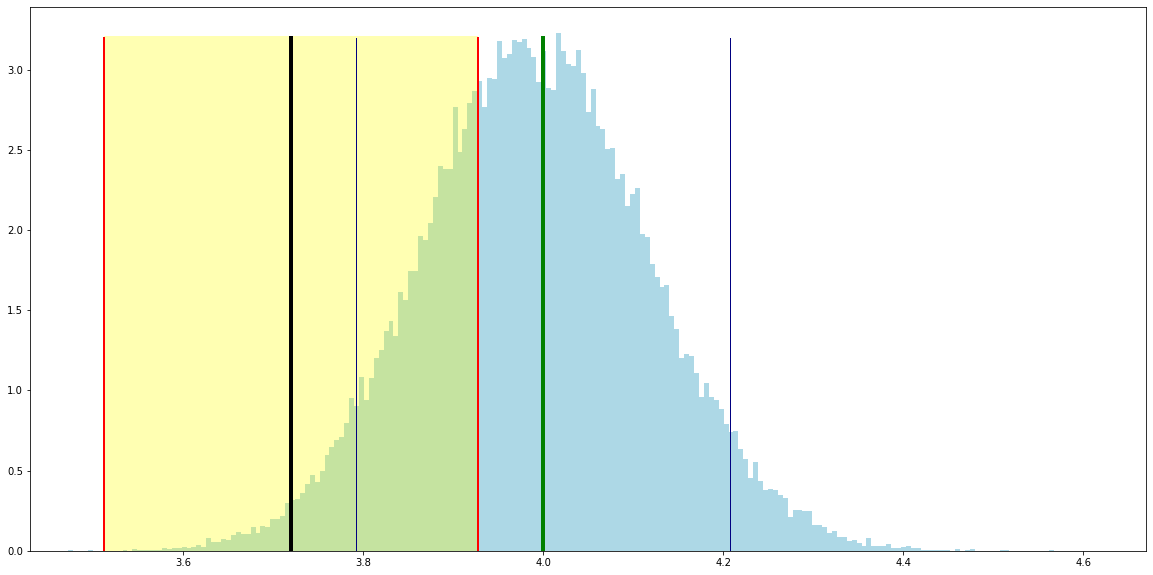

In [26]:
# use 90% instead of 95%
plt.figure(figsize=(20,10))
m = 3.72
plt.hist(meansample, 200, density=True, color='lightblue')
plt.plot([mu,mu],[0, 3.2], 'k-', lw=4, color='green')
plt.plot([mu-(1.645*sigma/np.sqrt(samplesize)),mu-(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([mu+(1.645*sigma/np.sqrt(samplesize)),mu+(1.645*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=1, color='navy')
plt.plot([m,m],[0, 3.2], 'k-', lw=4, color='black')
plt.plot([m-(1.645*ss),m-(1.645*ss)],[0, 3.2], 'k-', lw=2, color='red')
plt.plot([m+(1.645*ss),m+(1.645*ss)],[0, 3.2], 'k-', lw=2, color='red')
# Create a Rectangle patch
plt.gca().add_patch(plt.Rectangle((m-(1.645*ss), 0),2*(1.645*ss),3.21, fill=True, linewidth=3, fc=(1,1,0,0.3)))
plt.xlim(3.43, 4.67) 
plt.show()


Hence, when there is a 95% confidence interval we are confident that 95% of the samples will have a mean that is within the 95% range form the true mean. 
<br>As it is difficult to sample the true mean for large samples, we change the interpretation to "we are confident that for 95% of the samplings, the samples will have a mean that can create the interval which covers the true mean.

In theory, if we sample 100 times, 95 times we will have a sample mean that has an interval that covers the true mean, after simulating 100 samplings, this is what happens.

number of interval that cover the expected values: 98


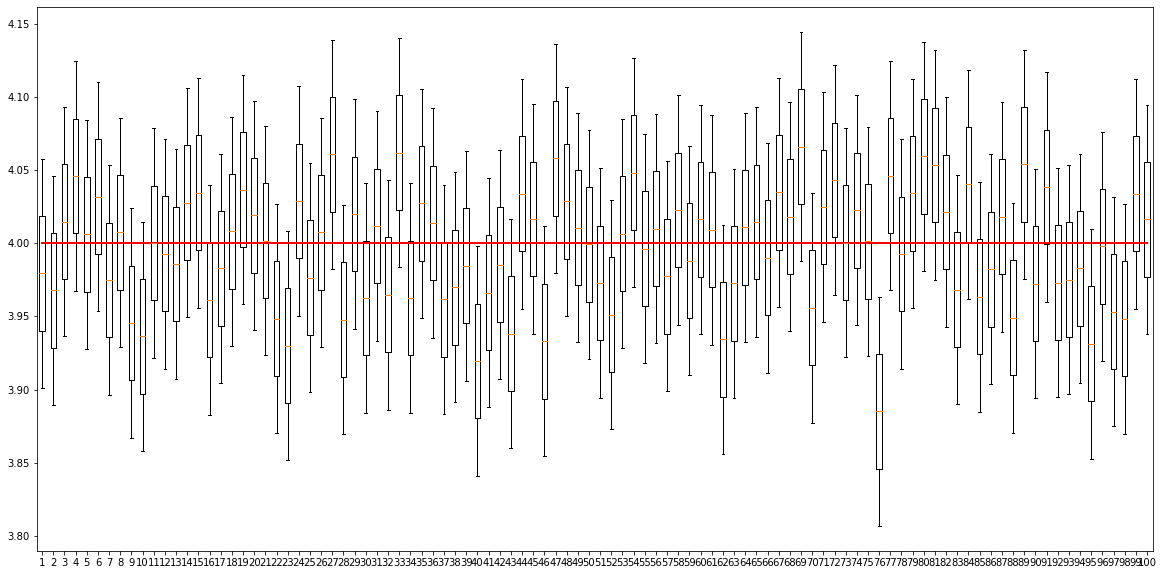

In [27]:
mu = shape*scale # mean and standard deviation
sigma = scale*np.sqrt(shape)
intervallist = []
k = 1.96
# sample size
samplesize = 5000
# start count
c = 0
for i in range(0,100):
    # sample 100 sample
    rs = random.choices(s, k=samplesize)
    # calculate mean
    mean = np.mean(rs)
    upbound = mean + k*sigma/np.sqrt(samplesize)
    lowbound = mean - k*sigma/np.sqrt(samplesize)
    # collect difference between sample mean and mu
    intervallist.append([lowbound,mean,upbound])
    if upbound >= mu and lowbound <= mu:
        c += 1
        
print("number of interval that cover the expected values:", c)
# set figure size.
plt.figure(figsize=(20,10))
# plot box plots of each sample mean.
plt.boxplot(intervallist)
plt.plot([1, 100],[mu,mu], 'k-', lw=2, color='red')
# show plot.
plt.show()